# Final Score Prediction Model
I have optimized the initial data to only the required variables, so now we have final csv file as T20I.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing dataset
T20I_df = pd.read_csv('T20I.csv')
print(f"Dataset successfully Imported of Shape : {T20I_df.shape}")

Dataset successfully Imported of Shape : (125063, 13)


## EDA

In [3]:
T20I_df.describe()

,match_id,overs,wickets,runs,total,runs_last_5,wickets_last_5
count,1.250630e+05,125063.000000,125063.000000,125063.000000,125063.000000,125063.000000,125063.000000
mean,9.310604e+05,9.716194,2.591798,70.763007,149.410977,32.129167,1.249162
std,3.368122e+05,5.742609,2.142688,47.578876,36.780281,15.357969,1.113531
min,2.110280e+05,0.100000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,5.937280e+05,4.600000,1.000000,32.000000,125.000000,22.000000,0.000000
50%,1.089778e+06,9.500000,2.000000,65.000000,149.000000,32.000000,1.000000
75%,1.202366e+06,14.500000,4.000000,103.000000,173.000000,42.000000,2.000000
max,1.335808e+06,19.600000,10.000000,263.000000,263.000000,104.000000,8.000000


In [4]:
T20I_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125063 entries, 0 to 125062
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   match_id        125063 non-null  int64  
 1   start_date      125063 non-null  object 
 2   venue           125063 non-null  object 
 3   overs           125063 non-null  float64
 4   batting_team    125063 non-null  object 
 5   bowling_team    125063 non-null  object 
 6   batsman         125063 non-null  object 
 7   bowler          125063 non-null  object 
 8   wickets         125063 non-null  int64  
 9   runs            125063 non-null  int64  
 10  total           125063 non-null  int64  
 11  runs_last_5     125063 non-null  int64  
 12  wickets_last_5  125063 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 12.4+ MB


In [5]:
T20I_df.nunique()

match_id          1070
start_date         809
venue              193
overs              123
batting_team        10
bowling_team        10
batsman            970
bowler             746
wickets             11
runs               258
total              189
runs_last_5        101
wickets_last_5       9
dtype: int64

In [6]:
T20I_df.dtypes

match_id            int64
start_date         object
venue              object
overs             float64
batting_team       object
bowling_team       object
batsman            object
bowler             object
wickets             int64
runs                int64
total               int64
runs_last_5         int64
wickets_last_5      int64
dtype: object

# Plot Distributions

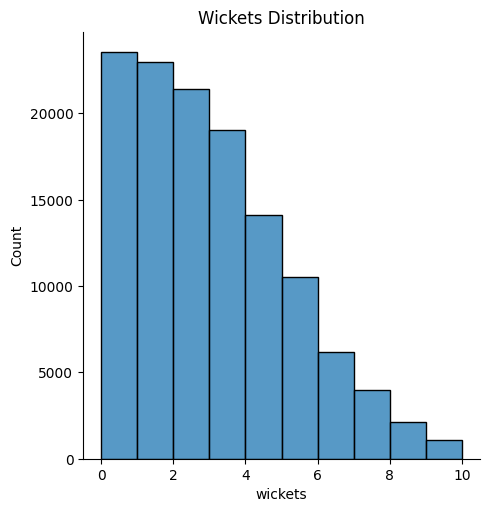

In [7]:
sns.displot(T20I_df['wickets'],kde=False,bins=10)
plt.title("Wickets Distribution")

plt.show()

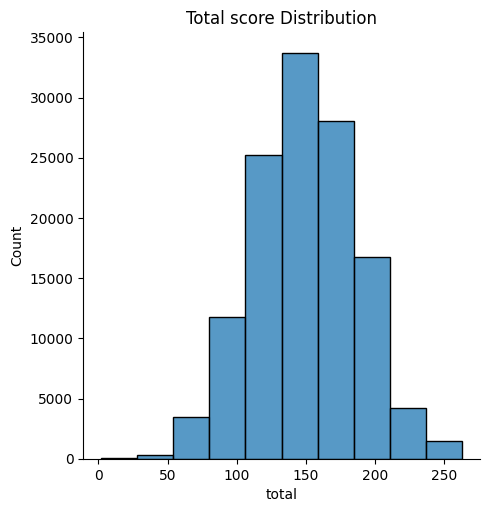

In [8]:
sns.displot(T20I_df['total'],kde=False,bins=10)
plt.title("Total score Distribution")

plt.show()

In [9]:
irrelevant = ['match_id','start_date','venue','batsman','bowler']
print(f'Before Removing Irrelevant Columns : {T20I_df.shape}')
T20I_df = T20I_df.drop(irrelevant, axis=1) # Drop Irrelevant Columns
print(f'After Removing Irrelevant Columns : {T20I_df.shape}')
T20I_df.head()

Before Removing Irrelevant Columns : (125063, 13)
After Removing Irrelevant Columns : (125063, 8)


,overs,batting_team,bowling_team,wickets,runs,total,runs_last_5,wickets_last_5
0,0.1,Australia,New Zealand,0,2,214,2,0
1,0.2,Australia,New Zealand,0,2,214,2,0
2,0.3,Australia,New Zealand,0,3,214,3,0
3,0.4,Australia,New Zealand,0,4,214,4,0
4,0.5,Australia,New Zealand,0,10,214,10,0


In [10]:
new_order = ['batting_team', 'bowling_team', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'total']
T20I_df = T20I_df[new_order]

In [11]:
print(f'Before Removing Overs : {T20I_df.shape}')
T20I_df = T20I_df[T20I_df['overs'] >= 5.0]
print(f'After Removing Overs : {T20I_df.shape}')
T20I_df.head()

Before Removing Overs : (125063, 8)
After Removing Overs : (93068, 8)


,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
30,Australia,New Zealand,54,4,5.1,52,4,214
31,Australia,New Zealand,55,4,5.2,53,4,214
32,Australia,New Zealand,56,4,5.3,53,4,214
33,Australia,New Zealand,57,4,5.4,53,4,214
34,Australia,New Zealand,57,4,5.5,47,4,214


C:\Users\lenovo\AppData\Local\Temp\ipykernel_14992\1982911172.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap(data=T20I_df.corr(), annot=True)


<Axes: >

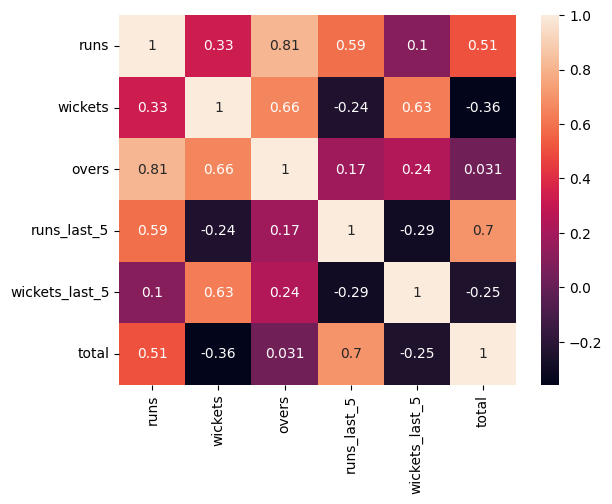

In [12]:
from seaborn import heatmap
heatmap(data=T20I_df.corr(), annot=True)

# Data Preprocessing and Encoding

In [13]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
for col in ['batting_team', 'bowling_team']:
  T20I_df[col] = le.fit_transform(T20I_df[col])
T20I_df.head()

,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
30,1,5,54,4,5.1,52,4,214
31,1,5,55,4,5.2,53,4,214
32,1,5,56,4,5.3,53,4,214
33,1,5,57,4,5.4,53,4,214
34,1,5,57,4,5.5,47,4,214


In [14]:
from sklearn.compose import ColumnTransformer
columnTransformer = ColumnTransformer([('encoder', 
                                        OneHotEncoder(), 
                                        [0, 1])], 
                                      remainder='passthrough')

In [15]:
T20I_df = np.array(columnTransformer.fit_transform(T20I_df))

In [16]:
cols = ['batting_team_India', 'batting_team_South Africa', 'batting_team_Australia', 'batting_team_New Zealand',
        'batting_team_Pakistan', 'batting_team_Afghanistan', 'batting_team_Sri Lanka', 'batting_team_England',
        'batting_team_Bangladesh', 'batting_team_West Indies',
        'bowling_team_India', 'bowling_team_South Africa', 'bowling_team_Australia', 'bowling_team_New Zealand',
        'bowling_team_Pakistan', 'bowling_team_Afghanistan', 'bowling_team_Sri Lanka', 'bowling_team_England',
        'bowling_team_Bangladesh', 'bowling_team_West Indies', 'runs', 'wickets', 'overs',
        'runs_last_5', 'wickets_last_5', 'total']

len(cols)

26

In [17]:
df = pd.DataFrame(T20I_df, columns=cols)

In [18]:
df.head()

,batting_team_India,batting_team_South Africa,batting_team_Australia,batting_team_New Zealand,batting_team_Pakistan,batting_team_Afghanistan,batting_team_Sri Lanka,batting_team_England,batting_team_Bangladesh,batting_team_West Indies,...,bowling_team_Sri Lanka,bowling_team_England,bowling_team_Bangladesh,bowling_team_West Indies,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,54.0,4.0,5.1,52.0,4.0,214.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,55.0,4.0,5.2,53.0,4.0,214.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,56.0,4.0,5.3,53.0,4.0,214.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,57.0,4.0,5.4,53.0,4.0,214.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,57.0,4.0,5.5,47.0,4.0,214.0


# Model Building

In [19]:
features = df.drop(['total'], axis=1)
labels = df['total']

In [20]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.20, shuffle=True)
print(f"Training Set : {train_features.shape}\nTesting Set : {test_features.shape}")

Training Set : (74454, 25)
Testing Set : (18614, 25)


In [21]:
models = dict()

### Algorithms

### Decision Tree regressor


In [22]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
# Train Model
tree.fit(train_features, train_labels)

DecisionTreeRegressor()

In [23]:
# Evaluate Model
train_score_tree = str(tree.score(train_features, train_labels) * 100)
test_score_tree = str(tree.score(test_features, test_labels) * 100)
print(f'Train Score : {train_score_tree[:5]}%\nTest Score : {test_score_tree[:5]}%')
models["tree"] = test_score_tree

Train Score : 99.96%
Test Score : 81.00%


In [24]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse
print("---- Decision Tree Regressor - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, tree.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, tree.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, tree.predict(test_features)))))

---- Decision Tree Regressor - Model Evaluation ----
Mean Absolute Error (MAE): 7.128908348554851
Mean Squared Error (MSE): 251.89057967121522
Root Mean Squared Error (RMSE): 15.871061075782402


### Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
# Train Model
linreg.fit(train_features, train_labels)

LinearRegression()

In [26]:
# Evaluate Model
train_score_linreg = str(linreg.score(train_features, train_labels) * 100)
test_score_linreg = str(linreg.score(test_features, test_labels) * 100)
print(f'Train Score : {train_score_linreg[:5]}%\nTest Score : {test_score_linreg[:5]}%')
models["linreg"] = test_score_linreg

Train Score : 72.22%
Test Score : 72.11%


In [27]:
print("---- Linear Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, linreg.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, linreg.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, linreg.predict(test_features)))))

---- Linear Regression - Model Evaluation ----
Mean Absolute Error (MAE): 14.223079108802514
Mean Squared Error (MSE): 369.8595008418257
Root Mean Squared Error (RMSE): 19.231731613191407


### Random Forest Regression

In [28]:
from sklearn.ensemble import RandomForestRegressor
print("imported")
forest = RandomForestRegressor()
print("loaded")
# Train Model
forest.fit(train_features, train_labels)

imported
loaded


RandomForestRegressor()

In [29]:
# Evaluate Model
train_score_forest = str(forest.score(train_features, train_labels)*100)
test_score_forest = str(forest.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_forest[:5]}%\nTest Score : {test_score_forest[:5]}%')
models["forest"] = test_score_forest

Train Score : 98.68%
Test Score : 90.82%


In [30]:
print("---- Random Forest Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, forest.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, forest.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, forest.predict(test_features)))))

---- Random Forest Regression - Model Evaluation ----
Mean Absolute Error (MAE): 6.986689396613916
Mean Squared Error (MSE): 121.6494288109588
Root Mean Squared Error (RMSE): 11.029479988238737


In [ ]:
from sklearn.svm import SVR
print("imported")
svm = SVR()
print("loaded")
# Train Model
svm.fit(train_features, train_labels)

imported
loaded


In [ ]:
train_score_svm = str(svm.score(train_features, train_labels)*100)
test_score_svm = str(svm.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_svm[:5]}%\nTest Score : {test_score_svm[:5]}%')
models["svm"] = test_score_svm 

In [ ]:
print("---- Support Vector Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, svm.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, svm.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, svm.predict(test_features)))))

### XGBoost

In [31]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
# Train Model
xgb.fit(train_features, train_labels)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [32]:
train_score_xgb = str(xgb.score(train_features, train_labels)*100)
test_score_xgb = str(xgb.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_xgb[:5]}%\nTest Score : {test_score_xgb[:5]}%')
models["xgb"] = test_score_xgb

Train Score : 85.50%
Test Score : 83.13%


In [33]:
print("---- XGB Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, xgb.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, xgb.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, xgb.predict(test_features)))))

---- XGB Regression - Model Evaluation ----
Mean Absolute Error (MAE): 10.795554480875962
Mean Squared Error (MSE): 223.67044117890515
Root Mean Squared Error (RMSE): 14.955615707115008


### KNR

In [34]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
# Train Model
knr.fit(train_features, train_labels)

KNeighborsRegressor()

In [39]:
train_score_knr = str(knr.score(train_features, train_labels)*100)
test_score_knr = str(knr.score(test_features, test_labels)*100)
print(f'Train Score : {train_score_knr[:5]}%\nTest Score : {test_score_knr[:5]}%')
models["knr"] = test_score_knr

Train Score : 89.10%
Test Score : 81.98%


In [40]:
print("---- KNR - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(test_labels, knr.predict(test_features))))
print("Mean Squared Error (MSE): {}".format(mse(test_labels, knr.predict(test_features))))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(test_labels, knr.predict(test_features)))))

---- KNR - Model Evaluation ----
Mean Absolute Error (MAE): 10.48187385838616
Mean Squared Error (MSE): 238.96951541850223
Root Mean Squared Error (RMSE): 15.458638860472233


## Comparision of the models

<BarContainer object of 5 artists>

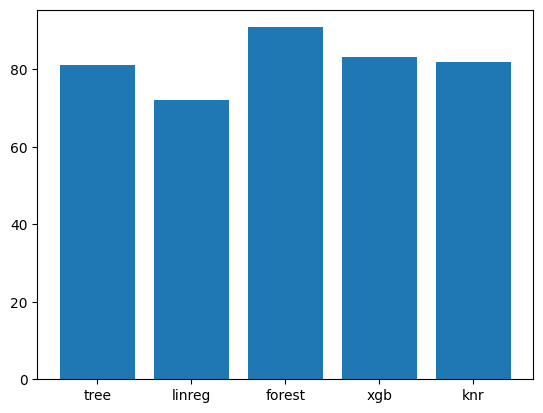

In [41]:
import matplotlib.pyplot as plt 
model_names = list(models.keys())
accuracy = list(map(float, models.values()))
# creating the bar plot
plt.bar(model_names, accuracy)

Clearly Forest wins

## Final Model

In [42]:
def score_predict(batting_team, bowling_team, runs, wickets, overs, runs_last_5, wickets_last_5, model=forest):
  prediction_array = []
  # Batting Team
  if batting_team == 'India':
    prediction_array = prediction_array + [1,0,0,0,0,0,0,0,0,0]
  elif batting_team == 'South Africa':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0,0,0]
  elif batting_team == 'Australia':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0,0,0]
  elif batting_team == 'New Zealand':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0,0,0]
  elif batting_team == 'Pakistan':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0,0,0]
  elif batting_team == 'Afghanistan':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0,0,0]
  elif batting_team == 'Sri Lanka':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0,0,0]
  elif batting_team == 'England':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1,0,0]
  elif batting_team == 'Bangladesh':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,0,1,0]
  elif batting_team == 'West Indies':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,0,0,1]
  # Bowling Team
  if bowling_team == 'India':
    prediction_array = prediction_array + [1,0,0,0,0,0,0,0,0,0]
  elif bowling_team == 'South Africa':
    prediction_array = prediction_array + [0,1,0,0,0,0,0,0,0,0]
  elif bowling_team == 'Australia':
    prediction_array = prediction_array + [0,0,1,0,0,0,0,0,0,0]
  elif bowling_team == 'New Zealand':
    prediction_array = prediction_array + [0,0,0,1,0,0,0,0,0,0]
  elif bowling_team == 'Pakistan':
    prediction_array = prediction_array + [0,0,0,0,1,0,0,0,0,0]
  elif bowling_team == 'Afghanistan':
    prediction_array = prediction_array + [0,0,0,0,0,1,0,0,0,0]
  elif bowling_team == 'Sri Lanka':
    prediction_array = prediction_array + [0,0,0,0,0,0,1,0,0,0]
  elif bowling_team == 'England':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,1,0,0]
  elif bowling_team == 'Bangladesh':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,0,1,0]
  elif bowling_team == 'West Indies':
    prediction_array = prediction_array + [0,0,0,0,0,0,0,0,0,1]
  prediction_array = prediction_array + [runs, wickets, overs, runs_last_5, wickets_last_5]
  prediction_array = np.array([prediction_array])
  pred = model.predict(prediction_array)
  return int(round(pred[0]))

### Examples

In [43]:
#example 1
batting_team='Afghanistan'
bowling_team='India'
score = score_predict(batting_team, bowling_team, overs=8.0, runs=63, wickets=3, runs_last_5=41, wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : 172')

Predicted Score : 165 || Actual Score : 172


C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [44]:
#example 2
batting_team='New Zealand'
bowling_team='Pakistan'
score = score_predict(batting_team, bowling_team, overs=10.0, runs=111, wickets=1, runs_last_5=52, wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : 194')

Predicted Score : 196 || Actual Score : 194


C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [45]:
#example 3
batting_team='New Zealand'
bowling_team='Bangladesh'
score = score_predict(batting_team, bowling_team, overs=10.0, runs=53, wickets=5, runs_last_5=31, wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : 134')

Predicted Score : 134 || Actual Score : 134


C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [46]:
#example 4 WT20 2022 final
batting_team='Pakistan'
bowling_team='England'
score = score_predict(batting_team, bowling_team, overs=10.0, runs=68, wickets=2, runs_last_5=39, wickets_last_5=2)
print(f'Predicted Score : {score} || Actual Score : 137')

Predicted Score : 158 || Actual Score : 137


C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [47]:
#example 5 WT20 2021 final
batting_team='New Zealand'
bowling_team='Australia'
score = score_predict(batting_team, bowling_team, overs=10.0, runs=57, wickets=1, runs_last_5=27, wickets_last_5=0)
print(f'Predicted Score : {score} || Actual Score : 172')

Predicted Score : 140 || Actual Score : 172


C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [48]:
#example 6 asia cup 2022
batting_team='Bangladesh'
bowling_team='Sri Lanka'
score = score_predict(batting_team, bowling_team, overs=15.0, runs=123, wickets=4, runs_last_5=38, wickets_last_5=1)
print(f'Predicted Score : {score} || Actual Score : 183')

Predicted Score : 170 || Actual Score : 183


C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [49]:
#example 7 
batting_team='West Indies'
bowling_team='South Africa'
score = score_predict(batting_team, bowling_team, overs=10.0, runs=137, wickets=1, runs_last_5=84, wickets_last_5=0)
print(f'Predicted Score : {score} || Actual Score : 258')

Predicted Score : 223 || Actual Score : 258


C:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


 ## Export

In [50]:
import pickle
filename = "T20I.pkl"
pickle.dump(forest, open(filename, "wb"))